In [1]:
import os
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def FT2D(np_data):
    f_img = np.fft.fft2(np_data)
    fshift_img = np.fft.fftshift(f_img)
    img_k_sapce = np.copy(fshift_img)
    magnitude_spectrum = 20*np.log(np.abs(fshift_img))
    plt.subplots(figsize = (4,4))
    plt.imshow(magnitude_spectrum, cmap = 'gray')
    plt.title('Orifinal K - Space'), plt.xticks([]), plt.yticks([])
    plt.show()
    return img_k_sapce

def Matrix_Reduction(img_k_sapce, number_freq=2):
    for i in range(img_k_sapce.shape[1]):
        if (i % number_freq != 0): img_k_sapce[:,i] = 0
    plt.subplots(figsize = (4,4))        
    plt.imshow(np.abs(img_k_sapce), cmap = 'gray')
    plt.title('Undersampled K-space'), plt.xticks([]), plt.yticks([])
    plt.show()
    return img_k_sapce

def iFT2D(img_k_sapce):
    f_ishift = np.fft.ifftshift(img_k_sapce)
    img_back = np.fft.ifft2(f_ishift)
    plt.subplots(figsize = (4,4))
    plt.imshow(np.abs(img_back), cmap = 'gray')
    plt.title('Undersampled original image'), plt.xticks([]), plt.yticks([])
    plt.show()
    return img_back

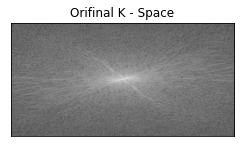

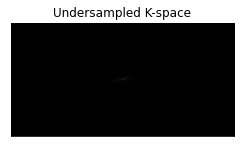

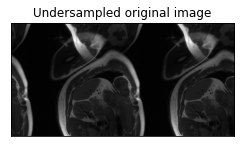

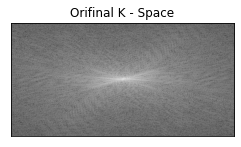

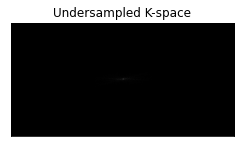

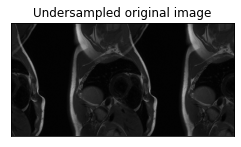

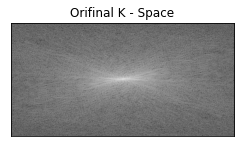

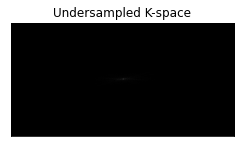

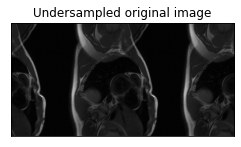

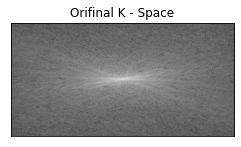

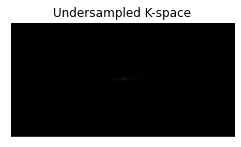

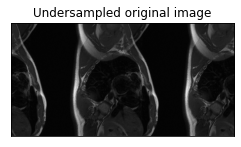

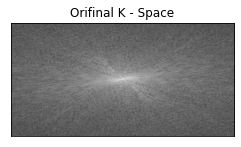

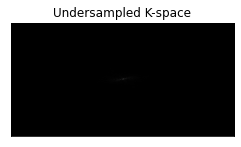

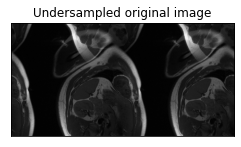

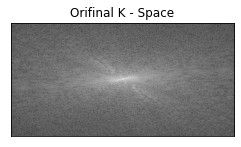

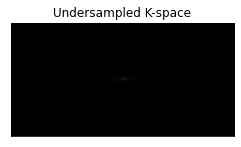

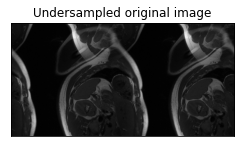

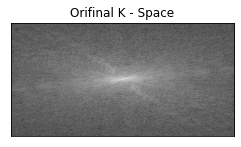

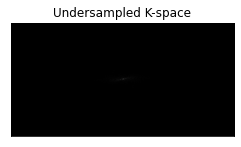

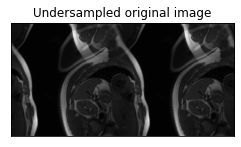

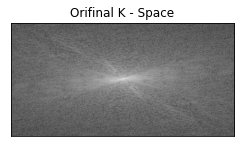

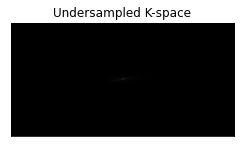

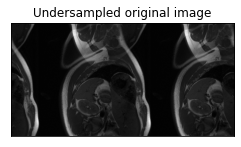

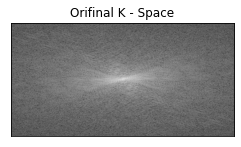

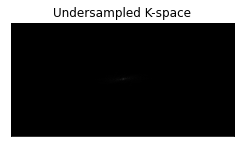

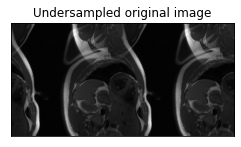

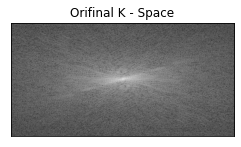

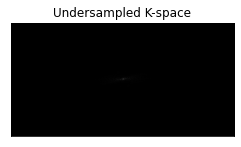

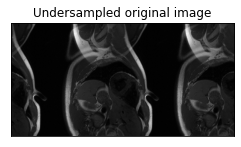

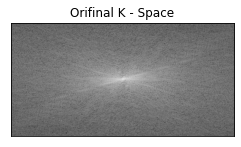

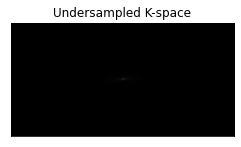

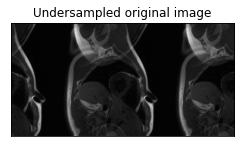

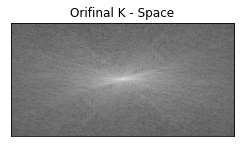

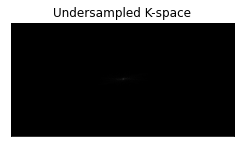

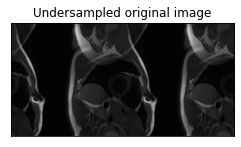

In [7]:
target_dir = 'D:\\undersampled_heart_images'
path = 'D:\\Madina\\5_without'
list_dir = os.listdir(path)

for file_ in list_dir:
    
    #reading
    tmp_name = os.path.join(path, file_)
    img = cv.imread(tmp_name, cv.IMREAD_GRAYSCALE)
    
    #processing
    tmp = FT2D(img)
    tmp = Matrix_Reduction(tmp)
    tmp = iFT2D(tmp)
    tmp = np.abs(tmp)
    
    #writing
    cv.imwrite(os.path.join(target_dir, file_), tmp)